In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np
import utils

In [2]:
# Define the mini-batch size
batch_size = 10

# Download the dataset and create the dataloaders
cifar_data = datasets.CIFAR10("./", train=True, download=True, transform=transforms.ToTensor())

train_size = int(0.8 * len(cifar_data))
val_size = len(cifar_data)-train_size

cifar_train, cifar_val = torch.utils.data.random_split(cifar_data, [train_size, val_size])

train_loader = DataLoader(cifar_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(cifar_val, batch_size=batch_size, shuffle=False)

cifar_test = datasets.CIFAR10("./", train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(cifar_test, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


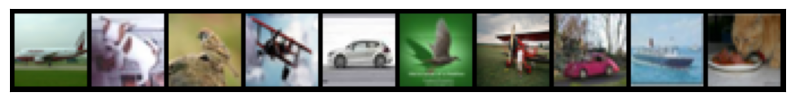

In [3]:
# plot the first 10 images
for images,lables in train_loader: 
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:10],10).permute(1,2,0))
    break

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(1600, 120)
        self.fc2 = nn.Linear(120, 10)
        self.leakyReLU = nn.LeakyReLU()

    def forward(self, x):
        # Implement the forward function in the network
        x = self.conv1(x)
        x = self.leakyReLU(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.leakyReLU(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = self.leakyReLU(x)
        x = self.fc2(x)
        return x

Epoch 0, training loss: 0.2304193518459797, validation loss: 0.23046172955036162
Train accuracy = 0.10255
Validation accuracy = 0.1029
Epoch 5, training loss: 0.23023195647001266, validation loss: 0.23027670998573302
Train accuracy = 0.104525
Validation accuracy = 0.1008
Epoch 10, training loss: 0.22985977285504341, validation loss: 0.22990768105983733
Train accuracy = 0.138725
Validation accuracy = 0.1089
Epoch 15, training loss: 0.22862092254757882, validation loss: 0.228596266746521
Train accuracy = 0.102375
Validation accuracy = 0.0936


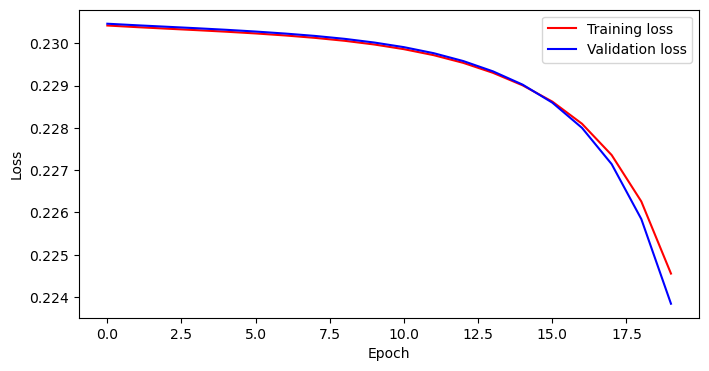

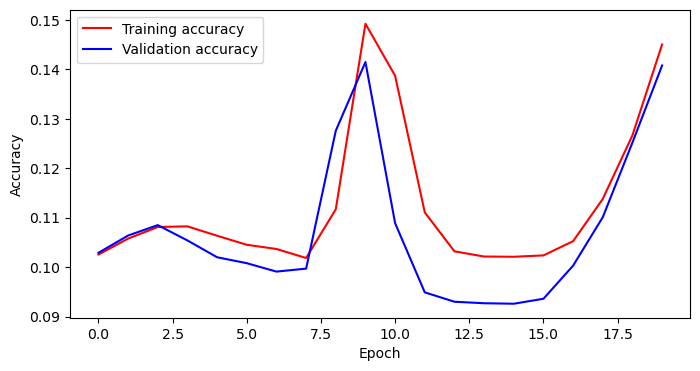

lowest loss for validation set: 0.223842969250679, with an accuracy of 0.1408


In [5]:
# Hyperparams
LEARNING_RATE = 0.0001
epochs = 20

# Load our network
model = Net()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Train the model
utils.train_model(model, criterion, optimizer, train_loader, val_loader, "best_model_SGD.pt", epochs)

In [6]:
# Test the model
best_model = Net()
best_model = torch.load('best_model_SGD.pt')

utils.test_model(best_model, test_loader)

Test accuracy is 15.0%.


### Changing optimzer to Adam

Epoch 0, training loss: 0.18675827004015447, validation loss: 0.16769344594478608
Train accuracy = 0.32815
Validation accuracy = 0.4042
Epoch 5, training loss: 0.13614191156998276, validation loss: 0.13659694656133653
Train accuracy = 0.514825
Validation accuracy = 0.5122
Epoch 10, training loss: 0.12247242362648249, validation loss: 0.12863934931159018
Train accuracy = 0.5681
Validation accuracy = 0.5406
Epoch 15, training loss: 0.11168581005930901, validation loss: 0.12463005567491055
Train accuracy = 0.609575
Validation accuracy = 0.5587


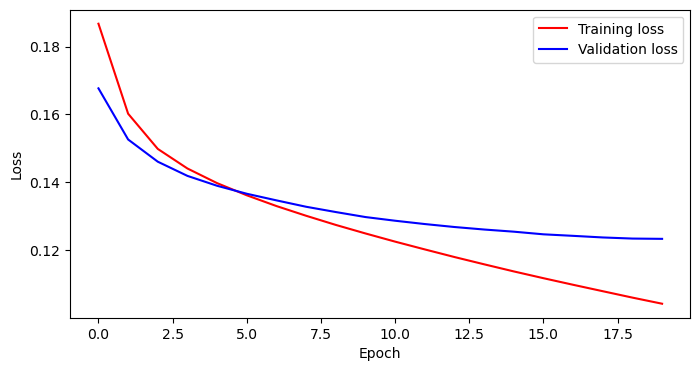

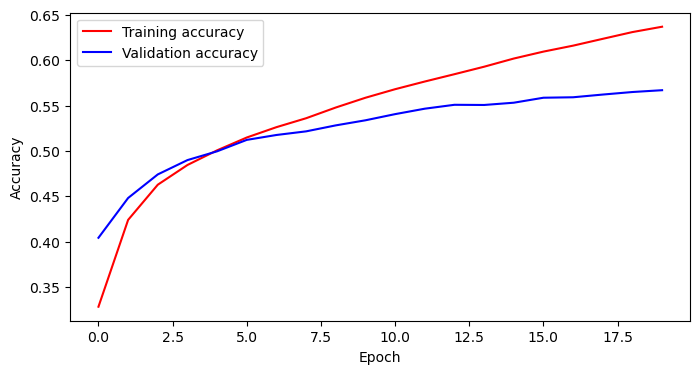

lowest loss for validation set: 0.12329308710098266, with an accuracy of 0.567


In [7]:
# Hyperparams
LEARNING_RATE = 0.0001
epochs = 20

# Load our network
model = Net()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train the model
utils.train_model(model, criterion, optimizer, train_loader, val_loader, "best_model_Adam.pt", epochs)

In [8]:
# Test the model
best_model = Net()
best_model = torch.load('best_model_Adam.pt')

utils.test_model(best_model, test_loader)

Test accuracy is 58.0%.
